<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Training_a_binary_classifier_with_the_Sarcasm_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-05-05 23:40:15--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 173.194.195.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-05-05 23:40:16 (132 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

with open('/content/sarcasm.json', 'r') as f:
  datastore = json.load(f)


In [10]:
datastore[:5] #containing dictionaries inside a list

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [11]:
type(datastore)

list

In [12]:
sentences = []
labels =  []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])


In [13]:
sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [14]:
labels[:5]

[0, 0, 1, 1, 0]

In [18]:
# define hyperparameters for tweeking 

training_size = 20000

vocab_size = 10000

max_length = 32

embedding_dim = 16

trunc_type = 'post'

padding_type = 'post'

oov_tok = '<00V>'


In [36]:
training_sentences = sentences[:20000]
training_labels = labels[:20000]

testing_sentences = sentences[20000:]
testing_labels = labels[20000:]


len(training_sentences), len(testing_sentences), len(training_labels)

(20000, 6709, 20000)

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type, padding = padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type, padding = padding_type)

# type(padded) is numpy array so we have to convert the training_labels(a list type) into numpy array also
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [38]:
type(training_padded), type(training_labels), type(training_labels_final)

(numpy.ndarray, list, numpy.ndarray)

In [39]:
# Build a model

import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(6, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [40]:
len(testing_padded), len(testing_labels_final), len(training_padded), len(training_labels_final)

(6709, 6709, 20000, 20000)

In [41]:
history = model.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6219 - accuracy: 0.6485 - val_loss: 0.4918 - val_accuracy: 0.8185
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3819 - accuracy: 0.8576 - val_loss: 0.3663 - val_accuracy: 0.8492
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2815 - accuracy: 0.8924 - val_loss: 0.3421 - val_accuracy: 0.8569
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2298 - accuracy: 0.9119 - val_loss: 0.3417 - val_accuracy: 0.8526
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1951 - accuracy: 0.9283 - val_loss: 0.3500 - val_accuracy: 0.8535
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1684 - accuracy: 0.9401 - val_loss: 0.3621 - val_accuracy: 0.8553
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1473 - accuracy: 0.9478 - val_loss: 0.3827 - val_accuracy: 0.8501
Epoch 

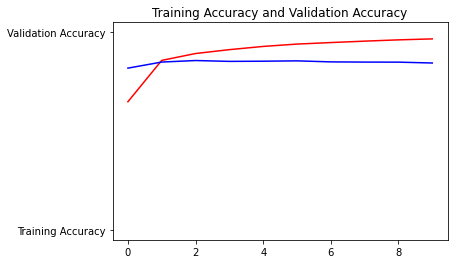

In [42]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.show()